# Quantum Fourier Transform

The QFT is already provided as routine. *Home exercise: try to implement it*.

In [125]:
from qat.lang.AQASM import *
from qat.lang.AQASM.qftarith import QFT

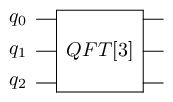

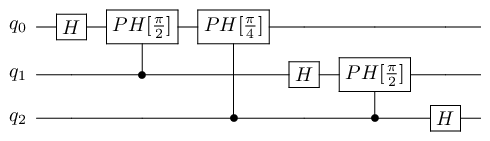

In [126]:
nqbits = 3
prog = Program()
qreg = prog.qalloc(nqbits)

prog.apply(QFT(nqbits), qreg)
qft_c = prog.to_circ()

%qatdisplay qft_c
%qatdisplay --depth=1 qft_c

In [127]:
from qat.qpus import PyLinalg
qpu = PyLinalg()

job = qft_c.to_job()
results = qpu.submit(job)

for sample in results:
    print(f"State {sample.state} with amplitude {sample.amplitude} and probability {sample.probability}")

State |000> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |001> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |010> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |011> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |100> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |101> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |110> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994
State |111> with amplitude (0.3535533905932737+0j) and probability 0.12499999999999994


# Arithmetic operations using QFT

The QFT can be used to perform standard arithmetic operations (sum between registers, sum with a constant value, multiplication).

We will see now its usage to build a circuit performing the sum of two quantum register. The addition is done ‘in place’: the second quantum register is left unaltered, while the first register will contain the result of the computation. In other words $|a\rangle|b\rangle \rightarrow |a+b\rangle|b\rangle$
The addition is modulo $n$, with $n$ the size of the register holding the result.

Let's generate two random bitstrings. We'll use them later to initialize our quantum registers.

In [130]:
import random

In [132]:
reglen = 2
bitstra = bin(random.getrandbits(reglen))[2:].zfill(reglen)
bitstrb = bin(random.getrandbits(reglen))[2:].zfill(reglen)

print(bitstra)
print(bitstrb)

00
10


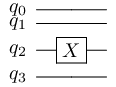

In [133]:
pr = Program()

qra = pr.qalloc(reglen)
qrb = pr.qalloc(reglen)

for bit, qbit in zip(bitstra, qra):
    if bit == "1":
        pr.apply(X, qbit)
for bit, qbit in zip(bitstrb, qrb):
    if bit == "1":
        pr.apply(X, qbit)
        
circ = pr.to_circ()
%qatdisplay circ

Now we apply the `add` function to the two quantum registers. The function takes as input
- size of first register
- size of second register
- first register
- second register

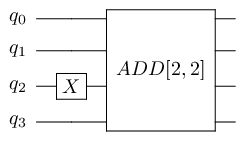

In [134]:
pr.apply(qftarith.add(len(qra), len(qrb)), qra, qrb)
circ = pr.to_circ()
%qatdisplay circ

Let's simulate the circuit and check the result.

In [135]:
job = circ.to_job(qubits=[qra])
results = qpu.submit(job)

for sample in results:
    print(f"State {sample.state} with probability {sample.probability}")

State |10> with probability 0.9999999999999993
